In [26]:
import pandas as pd

# Load the review embeddings CSV file into a DataFrame
embedded_df = pd.read_csv('embedded_review_reduced.csv')

# Display the first few rows of the DataFrame to verify it was loaded correctly
embedded_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,lengthReview,conditionCluster_label,drugNameCluster_label,...,320,321,322,323,324,325,326,327,328,329
0,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8.0,27-Apr-10,192.0,712.0,2.0,4.0,...,-0.072203,0.050732,-0.066741,-0.018283,-0.092436,-0.059485,-0.002017,0.068087,0.062693,0.019311
1,92703,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5.0,14-Dec-09,17.0,708.0,9.0,6.0,...,0.022241,-0.060561,0.042767,0.100795,-0.017772,-0.053921,-0.089212,-0.116708,0.053316,-0.029458
2,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8.0,3-Nov-15,10.0,428.0,9.0,4.0,...,0.100959,-0.072072,-0.060204,-0.012960,0.144626,-0.023831,0.137507,-0.030472,-0.074193,0.128502
3,35696,Buprenorphine naloxone,Opiate Dependence,Suboxone has completely turned my life around ...,9.0,27-Nov-16,37.0,669.0,0.0,2.0,...,0.117297,0.001229,0.014790,-0.107192,-0.008831,-0.100010,-0.108753,0.033484,0.010719,0.117703
4,155963,Cialis,Benign Prostatic Hyperplasia,2nd day on 5mg started to work with rock hard ...,2.0,28-Nov-15,43.0,373.0,0.0,5.0,...,0.064630,0.036089,-0.013739,-0.062118,-0.048534,0.005309,-0.077575,0.146462,-0.013111,-0.208725


In [27]:
# Read the review_sentiment CSV
sentiment_df = pd.read_csv('reviews_sentiments.csv')

# Display the first few rows of the DataFrame to verify it was loaded correctly
sentiment_df.head()

,uniqueID,review,sentiment
0,95260,My son is halfway through his fourth week of I...,POSITIVE
1,92703,I used to take another oral contraceptive whic...,NEGATIVE
2,138000,This is my first time using any form of birth ...,NEGATIVE
3,35696,Suboxone has completely turned my life around ...,POSITIVE
4,155963,2nd day on 5mg started to work with rock hard ...,NEGATIVE


In [28]:
!pip install wordcloud

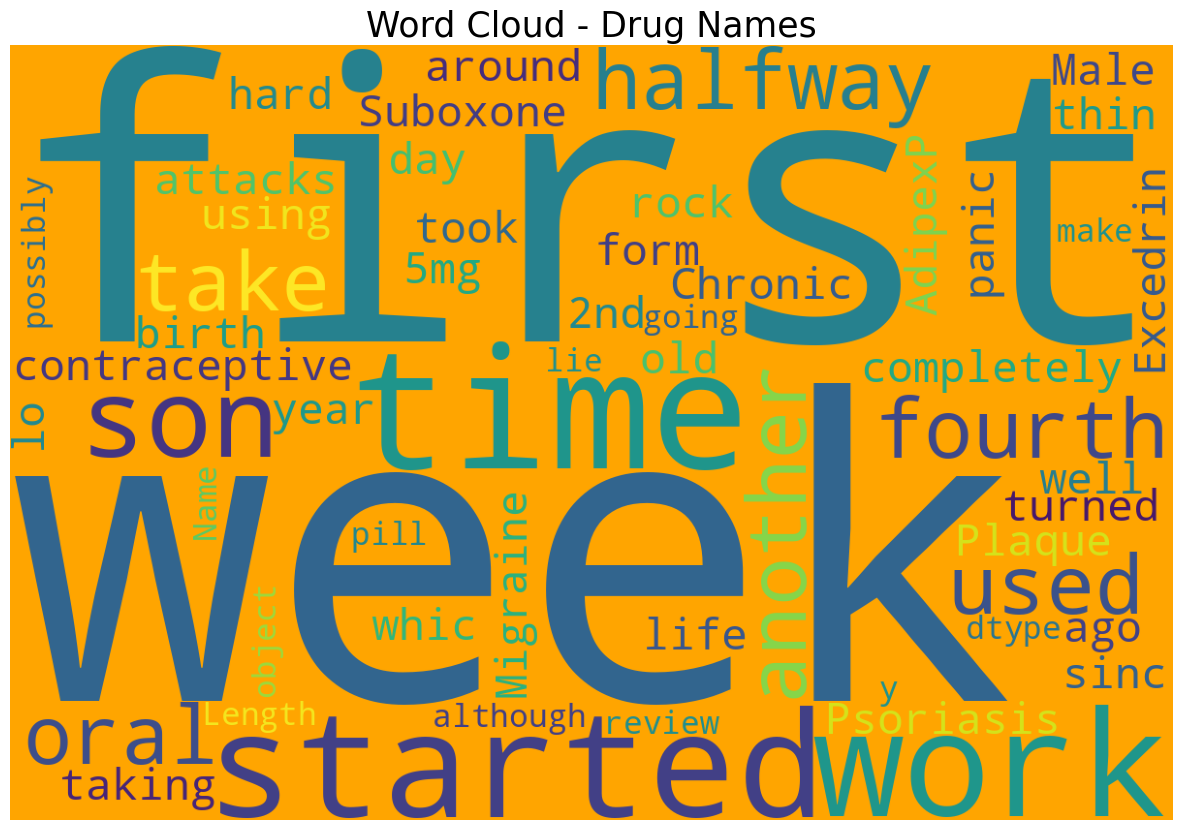

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(sentiment_df['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [31]:
#update the sentiment labels

sentiment_df['sentiment'].replace('POSITIVE', 0, inplace =True)

sentiment_df['sentiment'].replace('NEGATIVE', 1, inplace =True)

sentiment_df['sentiment'].replace('NEUTRAL', 2, inplace =True)

sentiment_df.head()

,uniqueID,review,sentiment
0,95260,My son is halfway through his fourth week of I...,0
1,92703,I used to take another oral contraceptive whic...,1
2,138000,This is my first time using any form of birth ...,1
3,35696,Suboxone has completely turned my life around ...,0
4,155963,2nd day on 5mg started to work with rock hard ...,1


In [32]:
# Records for each sentiments.POstive and negative labels are almost balanced, but very few records with neutral label.
sentiment_df['sentiment'].value_counts()

0    6294
1    4953
2      68
Name: sentiment, dtype: int64

In [33]:
# drop the review column from sentiment_df
sentiment_df.drop('review', axis=1, inplace=True)

In [ ]:
sentiment_df.head()

,uniqueID,sentiment
0,95260,0
1,92703,1
2,138000,1
3,35696,0
4,155963,1


In [34]:
embedded_sentiment_df = pd.merge(embedded_df, sentiment_df, on='uniqueID')

embedded_sentiment_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,lengthReview,conditionCluster_label,drugNameCluster_label,...,321,322,323,324,325,326,327,328,329,sentiment
0,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8.0,27-Apr-10,192.0,712.0,2.0,4.0,...,0.050732,-0.066741,-0.018283,-0.092436,-0.059485,-0.002017,0.068087,0.062693,0.019311,0
1,92703,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5.0,14-Dec-09,17.0,708.0,9.0,6.0,...,-0.060561,0.042767,0.100795,-0.017772,-0.053921,-0.089212,-0.116708,0.053316,-0.029458,1
2,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8.0,3-Nov-15,10.0,428.0,9.0,4.0,...,-0.072072,-0.060204,-0.012960,0.144626,-0.023831,0.137507,-0.030472,-0.074193,0.128502,1
3,35696,Buprenorphine naloxone,Opiate Dependence,Suboxone has completely turned my life around ...,9.0,27-Nov-16,37.0,669.0,0.0,2.0,...,0.001229,0.014790,-0.107192,-0.008831,-0.100010,-0.108753,0.033484,0.010719,0.117703,0
4,155963,Cialis,Benign Prostatic Hyperplasia,2nd day on 5mg started to work with rock hard ...,2.0,28-Nov-15,43.0,373.0,0.0,5.0,...,0.036089,-0.013739,-0.062118,-0.048534,0.005309,-0.077575,0.146462,-0.013111,-0.208725,1


In [35]:
# Total number of records in the dataframe
len(embedded_sentiment_df)

11315

In [36]:
# The NNet model classifies the sentiment as Postive, Negative and Neutral based on the review embeddings
# For now we are considering all the components

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [37]:
embedded_sentiment_df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'lengthReview', 'conditionCluster_label',
       'drugNameCluster_label',
       ...
       '321', '322', '323', '324', '325', '326', '327', '328', '329',
       'sentiment'],
      dtype='object', length=341)

In [38]:
# Drop all the columns that are not embeddings of the review and the sentiment labels.

columns_to_drop = ['uniqueID', 'drugName', 'condition', 'review', 'date', 'lengthReview', 'conditionCluster_label',
       'drugNameCluster_label']

embedded_sentiment333_df = embedded_sentiment_df.drop(columns=columns_to_drop)
embedded_sentiment333_df.head(5)

,rating,usefulCount,0,1,2,3,4,5,6,7,...,321,322,323,324,325,326,327,328,329,sentiment
0,8.0,192.0,1.887339,-0.869075,-2.625546,1.417739,0.745655,-0.639820,-0.805294,-0.375966,...,0.050732,-0.066741,-0.018283,-0.092436,-0.059485,-0.002017,0.068087,0.062693,0.019311,0
1,5.0,17.0,-0.000775,0.706566,-0.605744,-1.173229,0.284670,0.259833,0.353663,-0.332351,...,-0.060561,0.042767,0.100795,-0.017772,-0.053921,-0.089212,-0.116708,0.053316,-0.029458,1
2,8.0,10.0,0.710067,1.259798,-1.086482,-0.472165,-1.455680,-0.347598,0.391650,-0.770854,...,-0.072072,-0.060204,-0.012960,0.144626,-0.023831,0.137507,-0.030472,-0.074193,0.128502,1
3,9.0,37.0,0.987319,-0.213137,-0.683326,-1.648944,-0.148900,0.311274,0.131049,-0.585099,...,0.001229,0.014790,-0.107192,-0.008831,-0.100010,-0.108753,0.033484,0.010719,0.117703,0
4,2.0,43.0,-0.924630,0.702602,0.450114,-0.958159,-0.097065,-1.075369,-0.084259,0.394584,...,0.036089,-0.013739,-0.062118,-0.048534,0.005309,-0.077575,0.146462,-0.013111,-0.208725,1


In [39]:
# Split our preprocessed data into our features and target arrays

from keras.utils import to_categorical

# Separate the target variable
target = embedded_sentiment333_df['sentiment']

# Verify the unique values in the target variable
print(target.unique())

# Extract features (excluding the target variable)
features = embedded_sentiment333_df.drop(columns=['sentiment'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=30)

# Convert target labels to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

# Check the shapes of the one-hot encoded target labels
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

[0 1 2]
Shape of y_train_encoded: (7920, 3)
Shape of y_test_encoded: (3395, 3)


In [40]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
# Check the number of dimensions, make it a variable so it passes into

num_dimensions = embedded_sentiment333_df.shape[1]-1
print(num_dimensions)

332


In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# 3 classifications to predict now


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn = tf.keras.models.Sequential()

# Input layer
nn.add(tf.keras.layers.Dense(units=332, activation="sigmoid", input_dim=num_dimensions))

# Second hidden layer
nn.add(Dense(units=250, activation='relu'))

# Third hidden layer (example of adding an additional hidden layer)
nn.add(Dense(units=200, activation='relu'))

#Fourth hidden layer (example of adding another hidden layer)
nn.add(Dense(units=100, activation='relu'))

#Fifth hidden layer (example of adding another hidden layer)
# nn.add(Dense(units=100, activation='relu'))

#Sixth hidden layer (example of adding another hidden layer)
nn.add(Dense(units=50, activation='relu'))

#Seventh hidden layer (example of adding another hidden layer)
nn.add(Dense(units=25, activation='relu'))

#Eighth hidden layer (example of adding another hidden layer)
nn.add(Dense(units=15, activation='relu'))

# Output layer
nn.add(Dense(units=3, activation='softmax'))  # 3 units for 3 classes, softmax activation

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 332)               110556    
                                                                 
 dense_17 (Dense)            (None, 250)               83250     
                                                                 
 dense_18 (Dense)            (None, 200)               50200     
                                                                 
 dense_19 (Dense)            (None, 100)               20100     
                                                                 
 dense_20 (Dense)            (None, 50)                5050      
                                                                 
 dense_21 (Dense)            (None, 25)                1275      
                                                                 
 dense_22 (Dense)            (None, 15)               

In [43]:
# Compile the model - the loss function is categorical and not for binary classification

# Define optimizer with custom learning rate


nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
 # Fit the model to the training data
fit_model = nn.fit(X_train_scaled, y_train_encoded, epochs=10)

Epoch 1/10
248/248 [==============================] - 3s 7ms/step - loss: 0.6128 - accuracy: 0.6870
Epoch 2/10
248/248 [==============================] - 2s 7ms/step - loss: 0.4552 - accuracy: 0.8044
Epoch 3/10
248/248 [==============================] - 2s 6ms/step - loss: 0.4245 - accuracy: 0.8119
Epoch 4/10
248/248 [==============================] - 3s 12ms/step - loss: 0.3994 - accuracy: 0.8203
Epoch 5/10
248/248 [==============================] - 4s 15ms/step - loss: 0.3855 - accuracy: 0.8284
Epoch 6/10
248/248 [==============================] - 2s 9ms/step - loss: 0.3731 - accuracy: 0.8321
Epoch 7/10
248/248 [==============================] - 2s 7ms/step - loss: 0.3522 - accuracy: 0.8374
Epoch 8/10
248/248 [==============================] - 2s 6ms/step - loss: 0.3331 - accuracy: 0.8467
Epoch 9/10
248/248 [==============================] - 2s 6ms/step - loss: 0.3116 - accuracy: 0.8583
Epoch 10/10
248/248 [==============================] - 2s 8ms/step - loss: 0.2874 - accuracy: 0.87

In [45]:
test_loss, test_accuracy = nn.evaluate(X_test_scaled, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

107/107 [==============================] - 1s 4ms/step - loss: 0.5876 - accuracy: 0.7935
Test Loss: 0.5876285433769226
Test Accuracy: 0.7935198545455933


In [ ]:


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Define the model - deep neural net with L2 regularization
nn = Sequential()

# First hidden layer with L2 regularization
nn.add(Dense(units=332, activation="relu", kernel_regularizer=regularizers.l2(0.001), input_dim=num_dimensions))

# Second hidden layer with L2 regularization
nn.add(Dense(units=250, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Third hidden layer with L2 regularization
nn.add(Dense(units=200, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Fourth hidden layer with L2 regularization
nn.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Fifth hidden layer with L2 regularization
nn.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Sixth hidden layer with L2 regularization
nn.add(Dense(units=25, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Seventh hidden layer with L2 regularization
# nn.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Eighth hidden layer with L2 regularization
nn.add(Dense(units=15, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Output layer
nn.add(Dense(units=3, activation='softmax'))

# Define optimizer with custom learning rate
custom_optimizer = Adam(learning_rate=0.001)

# Compile the model with the custom optimizer
nn.compile(loss="categorical_crossentropy", optimizer=custom_optimizer, metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn.fit(X_train_scaled, y_train_encoded, epochs=200)

Epoch 1/200
248/248 [==============================] - 4s 7ms/step - loss: 1.3217 - accuracy: 0.7236
Epoch 2/200
248/248 [==============================] - 3s 11ms/step - loss: 0.8011 - accuracy: 0.8404
Epoch 3/200
248/248 [==============================] - 2s 9ms/step - loss: 0.6008 - accuracy: 0.8809
Epoch 4/200
248/248 [==============================] - 2s 7ms/step - loss: 0.4841 - accuracy: 0.9131
Epoch 5/200
248/248 [==============================] - 2s 7ms/step - loss: 0.4023 - accuracy: 0.9398
Epoch 6/200
248/248 [==============================] - 2s 6ms/step - loss: 0.3634 - accuracy: 0.9487
Epoch 7/200
248/248 [==============================] - 2s 7ms/step - loss: 0.3184 - accuracy: 0.9626
Epoch 8/200
248/248 [==============================] - 2s 7ms/step - loss: 0.2960 - accuracy: 0.9697
Epoch 9/200
248/248 [==============================] - 2s 9ms/step - loss: 0.2722 - accuracy: 0.9744
Epoch 10/200
248/248 [==============================] - 3s 11ms/step - loss: 0.2609 - accu

In [ ]:
test_loss, test_accuracy = nn.evaluate(X_test_scaled, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

107/107 [==============================] - 2s 7ms/step - loss: 1.4542 - accuracy: 0.7700
Test Loss: 1.454237461090088
Test Accuracy: 0.7699558138847351


In [ ]:
X_train_scaled.shape

(7920, 332)

In [ ]:
y_train_encoded.shape

(7920, 3)

In [ ]:
import numpy as np
#Get the test results from the above Neural Net

# Get predicted probabilities for each class
y_pred_probabilities = nn.predict(X_test_scaled)

# Convert probabilities to predicted classes by selecting the class with the highest probability
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Convert one-hot encoded y_test_encoded back to categorical labels
y_test_categorical = np.argmax(y_test_encoded, axis=1)

# Create a DataFrame to compare predicted and actual classes
result_df = pd.DataFrame({'Actual': y_test_categorical, 'Predicted': y_pred})

# Add a column indicating whether the prediction was correct
result_df['Correct'] = result_df['Actual'] == result_df['Predicted']

# Display the DataFrame
print(result_df)

# Calculate accuracy manually
accuracy = result_df['Correct'].mean()
print("Manual Test Accuracy:", accuracy)

107/107 [==============================] - 1s 3ms/step
      Actual  Predicted  Correct
0          1          1     True
1          0          0     True
2          0          1    False
3          1          1     True
4          0          0     True
...      ...        ...      ...
3390       1          0    False
3391       1          1     True
3392       0          0     True
3393       0          0     True
3394       0          0     True

[3395 rows x 3 columns]
Manual Test Accuracy: 0.7699558173784978


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_input', min_value=64, max_value=800, step=64), activation='relu', input_dim=num_dimensions))
    for i in range(hp.Int('num_layers', 1, 8)):  # Number of hidden layers
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=64, max_value=512, step=64), activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

# Instantiate the tuner and perform hyperparameter search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

tuner.search(X_train_scaled, y_train_encoded, epochs=5, validation_split=0.2)

# Get the best hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Optimal number of units in the input layer: {best_hps.get('units_input')}")
print(f"Optimal learning rate for the optimizer: {best_hps.get('learning_rate')}")
print(f"Optimal number of hidden layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Optimal number of units in layer {i}: {best_hps.get('units_' + str(i))}")

# Build the model with the best hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print("Test accuracy:", accuracy)

Trial 20 Complete [00h 00m 33s]
val_accuracy: 0.7933501601219177

Best val_accuracy So Far: 0.8057660063107809
Total elapsed time: 00h 13m 09s
Optimal number of units in the input layer: 256
Optimal learning rate for the optimizer: 0.001
Optimal number of hidden layers: 8
Optimal number of units in layer 0: 512
Optimal number of units in layer 1: 64
Optimal number of units in layer 2: 384
Optimal number of units in layer 3: 320
Optimal number of units in layer 4: 128
Optimal number of units in layer 5: 384
Optimal number of units in layer 6: 512
Optimal number of units in layer 7: 256
Epoch 1/50
198/198 [==============================] - 6s 21ms/step - loss: 0.5952 - accuracy: 0.7039 - val_loss: 0.5046 - val_accuracy: 0.7778
Epoch 2/50
198/198 [==============================] - 3s 14ms/step - loss: 0.3917 - accuracy: 0.8401 - val_loss: 0.4805 - val_accuracy: 0.7948
Epoch 3/50
198/198 [==============================] - 3s 14ms/step - loss: 0.3009 - accuracy: 0.8846 - val_loss: 0.4887 - 